## Learning Objectives

- **Define** what Pandas is and how it relates to data science
- **Manipulate** Pandas DataFrames and Series
- **Filter and sort** data using Pandas
- **Manipulate** DataFrame columns
- **Know** how to handle null and missing values

## Lesson Guide

- [What is Pandas](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [EXERCISE ONE](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [EXERCISE TWO](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [EXERCISE THREE](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [EXERCISE FOUR](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What is Pandas

- **Objective:** **Define** what Pandas is and how it relates to data science

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`)
- Note that each column in a `DataFrame` can be considered a `Series`. (`Series` index).

> Behind the scenes, these datatypes use the NumPy library ("Numerical Python"). NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list -- it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g. a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and use less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a DataFrame row-by-row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column-by-column. (This is because each column is stored separately as an ndarray, and NumPy is optimized for operating on ndarrays!)

Do not be discouraged if Pandas feels overwhelming. Gradually as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Class methods and attributes

Pandas `DataFrame`s are Pandas class objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [36]:
# Load pandas into python
import pandas as pd

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [37]:
# read 'u.user' into 'users'
with open("data/user.tbl", "r") as f:
    my_file = f.readline()
my_file

'user_id|age|gender|occupation|zip_code\n'

In [38]:
my_user = pd.read_table("data/user.tbl", sep="|")
my_user

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


**Examine the users data**

In [39]:
        # print the first 30 and last 30 rows
my_user.head(30)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [40]:
my_user.tail(30)

,user_id,age,gender,occupation,zip_code
913,914,44,F,other,08105
914,915,50,M,entertainment,60614
915,916,27,M,engineer,N2L5N
916,917,22,F,student,20006
917,918,40,M,scientist,70116
918,919,25,M,other,14216
919,920,30,F,artist,90008
920,921,20,F,student,98801
921,922,29,F,administrator,21114
922,923,21,M,student,E2E3R


In [41]:
          # DataFrame

In [42]:
          # print the first 5 rows

In [43]:
         # print the first 10 rows

In [44]:
          # print the last 5 rows

In [45]:
 # the row index (aka "the row labels" -- in this case integers)
my_user.index

RangeIndex(start=0, stop=943, step=1)

In [46]:
# column names (which is "an index")
my_user.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [47]:
# data types of each column -- each column is stored as an ndarray which has a data type
my_user.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [48]:
# number of rows and columns
my_user.shape

(943, 5)

In [49]:
# all values as a numpy array
my_user.values

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ...,
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

In [50]:
# concise summary (including memory usage) -- useful to quickly see if nulls exist
my_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


** Selecting or indexing data**
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [51]:
# select a column - returns a Pandas 'Series' (essentially an ndarray with an index)
my_user.gender

0      M
1      F
2      M
3      M
4      F
      ..
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [52]:
# 'DataFrame' columns are Pandas 'Series'
my_user.describe(include="all")

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [53]:
# select one column using the DataFrame attribute


# while a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces

**summarize (describe) the data**
Pandas has a bunch of built in methods to quickly summaraize your data and provide you with a quick general understanding.

In [54]:
# describe all numeric columns
               

In [55]:
# describe all object columns (can include multiple types)


In [56]:
# describe all columns, including non-numeric


In [57]:
# describe a single column -- recall that 'users.gender' refers to a Series


In [58]:
# calculate the mean of the ages
my_user.age.mean()

34.05196182396607

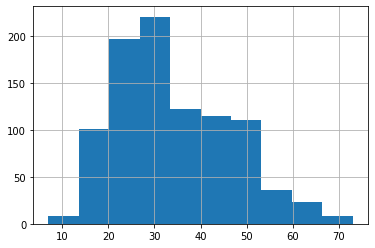

In [59]:
# draw a histogram of a column (the distribution of ages)
my_user.age.hist()

**Count the number of occurrences of each value**

In [60]:
   # most useful for categorical variables
my_user.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

In [61]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count By Gender')

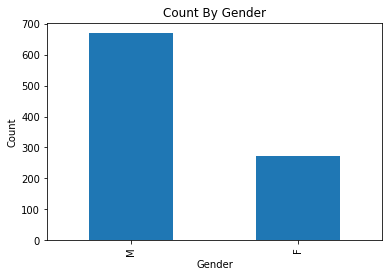

In [62]:
    # quick plot by category
%matplotlib inline
my_user.gender.value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count By Gender")


In [63]:
# can also be used with numeric variables
#   try .sort_index() to sort by indices or .sort_values() to sort by counts


<a id="exercise-one"></a>
### EXERCISE ONE

In [64]:
# read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_csv("data/drinks.csv")

In [65]:
# print the head and the tail
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [66]:
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [67]:
# examine the default index, data types, and shape
drinks.index


RangeIndex(start=0, stop=193, step=1)

In [68]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [69]:
drinks.shape

(193, 6)

In [70]:
# print the 'beer_servings' Series
drinks.beer_servings

#or
drinks["beer_servings"]

0        0
1       89
2       25
3      245
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [71]:
# calculate the average 'beer_servings' for the entire dataset
drinks.beer_servings.mean()


106.16062176165804

In [72]:
# count the number of occurrences of each 'continent' value and see if it looks correct
drinks.continent.value_counts()


AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [73]:
# Does not look correct.  Where is NA, North America?

<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** **Filter and sort** data using Pandas

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**logical filtering: only show users with age < 20**

In [74]:
my_user.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

In [75]:
# create a Series of booleans...
# in Pandas, this comparison is performed element-wise on each row of data
young_bol = my_user[my_user["age"] < 20]

In [76]:
young_bol

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
...,...,...,...,...,...
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249
903,904,17,F,student,61073


In [77]:
# ...and use that Series to filter rows
# in Pandas, indexing a DataFrame by a Series of booleans only selects rows that are True in the boolean


In [78]:
# or, combine into a single step


In [79]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that)
# You will alter only the slice of the DataFrame and not the actual DataFrame itself
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

# It is best practice to use .loc and .iloc instead of the syntax below

  # to resolve this warning, copy the DataFrame using .copy()


In [80]:
# select one column from the filtered results
young_bol.occupation

29      student
35      student
51      student
56         none
66      student
         ...   
871     student
879     student
886     student
903     student
924    salesman
Name: occupation, Length: 77, dtype: object

In [81]:
# value_counts of resulting Series
young_bol.occupation.value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
artist            1
salesman          1
Name: occupation, dtype: int64

**logical filtering with multiple conditions**

In [82]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!

my_user[(my_user.age < 20) & (my_user.occupation == "student")] 

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
66,67,17,M,student,60402
67,68,19,M,student,22904
...,...,...,...,...,...
862,863,17,M,student,60089
871,872,19,F,student,74078
879,880,13,M,student,83702
886,887,14,F,student,27249


In [83]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
my_user[(my_user.age < 20) | (my_user.occupation == "student")] 

,user_id,age,gender,occupation,zip_code
8,9,29,M,student,01002
29,30,7,M,student,55436
31,32,28,F,student,78741
32,33,23,M,student,27510
35,36,19,F,student,93117
...,...,...,...,...,...
927,928,21,M,student,55408
932,933,28,M,student,48105
938,939,26,F,student,33319
940,941,20,M,student,97229


In [84]:
# preferred alternative to multiple OR conditions
my_user[my_user.occupation.isin(["doctor","lawyer"])]

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


**Sorting**

In [85]:
# sort a Series
my_user.age.sort_values(ascending=False)

480    73
859    70
802    70
766    70
584    69
       ..
608    13
879    13
288    11
470    10
29      7
Name: age, Length: 943, dtype: int64

In [86]:
# sort by multiple columns
my_user.sort_values(by= "age")

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
...,...,...,...,...,...
584,585,69,M,librarian,98501
766,767,70,M,engineer,00000
802,803,70,M,administrator,78212
859,860,70,F,retired,48322


<a id="exercise-two"></a>
### EXERCISE TWO
Use the `drinks.csv` or `drinks` dataframe from earlier to complete the following.

In [87]:
# filter DataFrame to only include European countries

drinks_2 = drinks[drinks["continent"] == "EU"]

In [88]:
# filter DataFrame to only include European countries with wine_servings > 300

drinks_2[drinks_2.wine_servings > 300]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [89]:
# calculate the average 'beer_servings' for all of Europe

drinks_2.beer_servings.mean()

193.77777777777777

In [90]:
# determine which 10 countries have the highest total_litres_of_pure_alcohol
drinks.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** **Manipulate** DataFrame columns

In [91]:
# Print the column labels
drinks.columns


Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [92]:
# renaming one or more columns in a single output using value mapping
drinks["beer"] = drinks["beer_servings"]

<a id="exercise-three"></a>
### EXERCISE THREE

In [93]:
# read ufo.csv into a DataFrame called 'ufo'
ufo = pd.read_csv("data/ufo.csv")

In [94]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [95]:
# check the shape of the DataFrame
ufo.shape

(80543, 5)

In [96]:
# rename any columns with spaces so that they don't contain spaces

ufo.columns
ufo.columns = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']

In [97]:
# for reports in VA, what's the most common city?
ufo.loc[ufo.State == "Va"].City.value_counts().head(1)

Series([], Name: City, dtype: int64)

In [98]:
# print a DataFrame containing only reports from Arlington, VA
Arlington = ufo[(ufo.City == "Arlington") & (ufo.State == "VA")]
Arlington

,City,Colors_Reported,Shape_Reported,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00
21201,Arlington,GREEN,FIREBALL,VA,1/7/2002 17:45
22633,Arlington,NaN,LIGHT,VA,7/26/2002 1:15
22780,Arlington,NaN,LIGHT,VA,8/7/2002 21:00
25066,Arlington,NaN,CIGAR,VA,6/1/2003 22:34
27398,Arlington,NaN,VARIOUS,VA,12/13/2003 2:00


In [99]:
# count the number of missing values in each column
ufo.isna().sum()

City                  47
Colors_Reported    63509
Shape_Reported      8402
State                  0
Time                   0
dtype: int64

In [100]:
ufo.dropna().shape

(15510, 5)

In [101]:
# how many rows remain if you drop all rows with any missing values?
ufo[["State", "Time"]].head()

,State,Time
0,NY,6/1/1930 22:00
1,NJ,6/30/1930 20:00
2,CO,2/15/1931 14:00
3,KS,6/1/1931 13:00
4,NY,4/18/1933 19:00


<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-Apply-Combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the mean() function to find the average beer consumption.
- **Combine:** We now combine the continent names with the mean()s to produce a summary of our findings.

In [102]:
# for each continent, calculate the mean beer servings
drinks.groupby("continent").mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer
continent,,,,,
AF,61.471698,16.339623,16.264151,3.007547,61.471698
AS,37.045455,60.840909,9.068182,2.170455,37.045455
EU,193.777778,132.555556,142.222222,8.617778,193.777778
OC,89.687500,58.437500,35.625000,3.381250,89.687500
SA,175.083333,114.750000,62.416667,6.308333,175.083333


In [103]:
# for each continent, calculate the mean of all numeric columns
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,89
2,Algeria,25,0,14,0.7,AF,25
3,Andorra,245,138,312,12.4,EU,245
4,Angola,217,57,45,5.9,AF,217


In [104]:
# for each continent, describe beer servings
drinks.groupby('continent').beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [105]:
# similar, but outputs a DataFrame and can be customized -- "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer_servings.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
continent,,,,
AF,53,61.471698,0,376
AS,44,37.045455,0,247
EU,45,193.777778,0,361
OC,16,89.687500,0,306
SA,12,175.083333,93,333


In [106]:
# for each continent, describe all numeric columns
drinks.groupby('continent').describe()

beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 spirit_servings              ...  \
             max           count        mean  ...   
continent                                     ...   
AF         376.0            53.0   16.339623  ...   
AS         247.0            44.0   60.840909  ...   
EU         361.0            45.0  132.555556  ...   
OC         306.0            16.0   58.437500  ...   
SA         333.0            12.0  114.750000  ...   

          total_litres_of_pure_alcohol        beer                         \
                                   75%   max count        mean        std   
continent                                                                   
AF                               4.700   9.1  53.0   61.471698  80.557816   
AS                               2.425  11.5  44.0   37.045455  49.469725   
EU                              10.900  14.4  45.0  193.777778  99.631569   
OC                               6.150  10.4  16.0   89.687500  96.641412   
SA                               7.375   8.3  12.0  175.083333  65.242845   

                                               
            min     25%    50%     75%    max  
continent                                      
AF          0.0   15.00   32.0   76.00  376.0  
AS          0.0    4.25   17.5   60.50  247.0  
EU          0.0  127.00  219.0  270.00  361.0  
OC          0.0   21.00   52.5  125.75  306.0  
SA         93.0  129.50  162.5  198.00  333.0  

[5 rows x 40 columns]

In [107]:
# for each continent, count the number of rows
   # should be the same
    
drinks.shape

(193, 7)

<a id="exercise-four"></a>
### EXERCISE FOUR

Use the `Users` dataframe or `users` file in the Data folder to complete the following.

In [108]:
# for each occupation in 'users', count the number of occurrences
my_user.occupation.value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64

In [109]:
# for each occupation, calculate the mean age
my_user.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [110]:
# for each occupation, calculate the minimum and maximum ages
my_user.groupby("occupation").age.agg(["min","max"])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [111]:
# for each combination of occupation and gender, calculate the mean age

my_user.groupby(["occupation", "gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

----

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [112]:
# select multiple columns -- yet another overload of the DataFrame indexing operator!
    # create a list of column names...
                 # ...and use that list to select columns

col = ufo.columns
col

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [113]:
# or, combine into a single step (this is a Python list inside of the Python index operator!)
ufo[col[0:2]]

,City,Colors_Reported
0,Ithaca,NaN
1,Willingboro,NaN
2,Holyoke,NaN
3,Abilene,NaN
4,New York Worlds Fair,NaN
...,...,...
80538,Neligh,NaN
80539,Uhrichsville,NaN
80540,Tucson,RED BLUE
80541,Orland park,RED


**Use `loc` to select columns by name**

In [114]:
# 'loc' locates the values from the first parameter (colon means "all rows"), and the column 'City'
ufo.loc[:,"City"]

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [115]:
# select two columns
ufo.loc[:,["City", "State"]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [116]:
# select a range of columns -- unlike Python ranges, Pandas index ranges INCLUDE the final column in the range

ufo.loc[:,"Colora_Reported":]

,Colors_Reported,Shape_Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
80538,NaN,CIRCLE,NE,9/4/2014 23:20
80539,NaN,LIGHT,OH,9/5/2014 1:14
80540,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,RED,LIGHT,IL,9/5/2014 3:43


In [117]:
# loc can also filter rows by "name" (the index)
# row 0, all columns
ufo.iloc[:1,]

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00


In [118]:
# rows 0/1/2, all columns
ufo.iloc[:3,]

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [119]:
# rows 0/1/2, range of columns
ufo.loc[:2,"Colors_Reported":"State"]

,Colors_Reported,Shape_Reported,State
0,NaN,TRIANGLE,NY
1,NaN,OTHER,NJ
2,NaN,OVAL,CO


In [120]:
# use iloc to filter rows and select columns by integer position
# (remember that rows/columns use indices, so iloc lets you refer to indices via their index rather than value!)
# all rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0,3]]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [121]:
# all rows, columns in position 0/1/2/3
# subtly, note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4]

,City,Colors_Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE
80539,Uhrichsville,NaN,LIGHT,OH
80540,Tucson,RED BLUE,NaN,AZ
80541,Orland park,RED,LIGHT,IL


In [ ]:
# rows in position 0/1/2, all columns
ufo.iloc[0:3,:]

<a id="joining-dataframes"></a>
### Joining (Merging) DataFrames

In [ ]:
# read 'u.item' into 'movies'
movies = pd.read_table("data//movies.tbl, sep = "|")

<a id="uncommon-features"></a>
### OPTIONAL: Other Less Used Features of Pandas

In [ ]:
# detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # count of duplicates
users[users.duplicated()]   # only show duplicates
users.drop_duplicates()     # drop duplicate rows
users.age.duplicated()      # check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # specify columns for finding duplicates

In [ ]:
# convert a range of values into descriptive groups
drinks['beer_level'] = 'low'    # initially set all values to 'low'
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # change 101-200 to 'med'
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # change 201-400 to 'high'

In [ ]:
# display a cross-tabulation of two Series
pd.crosstab(drinks.continent, drinks.beer_level)

In [ ]:
# convert 'beer_level' into the 'category' data type
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # sorts by the categorical ordering (low to high)

In [ ]:
# limit which rows are read when reading in a file -- useful for large files!
pd.read_csv('../data/drinks.csv', nrows=10)           # only read first 10 rows
pd.read_csv('../data/drinks.csv', skiprows=[1, 2])    # skip the first two rows of data

In [ ]:
# write a DataFrame out to a CSV
drinks.to_csv('drinks_updated.csv')                 # index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # ignore index

In [ ]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# create a DataFrame from a list of lists
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])




In [ ]:
# randomly sample a DataFrame
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # create a Series of booleans
train = drinks[mask]                        # will contain around 66% of the rows
test = drinks[~mask]                        # will contain the remaining rows

In [ ]:
# change the maximum number of rows and columns printed ('None' means unlimited)
pd.set_option('max_rows', None)     # default is 60 rows
pd.set_option('max_columns', None)  # default is 20 columns
print(drinks)

In [ ]:
# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# change the options temporarily (settings are restored when you exit the 'with' block)
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

Amazingly, we only barely touched the surface of everything that Pandas offers! Do not worry if you do not remember most of it -- for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating DataFrames and Series
- Filtering Columns and Rows
- Handling Missing Values
- Split-Apply-Combine (this one takes some practice!)